# Task2 : Prediction Using Unsupervised ML

  **created by : Dief Mohamed**
 
  **tool Used : Machine Learning With Python**

 - **from the given "Iris" dataset. predict the optimum number of clusters and represent it visually.**
 - **Dataset** : [https://bit.ly/3kXTdox]

In [6]:
#import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [7]:
#load the data from remote link 
data = datasets.load_iris()
data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
df = pd.DataFrame(data.data , columns = data.feature_names )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


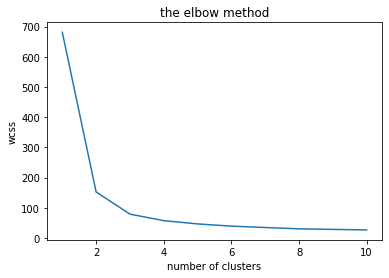

In [9]:
#using the elbow method to find the optimal number of clusters 
from sklearn.cluster import KMeans
X = df.iloc[ : ,0:4].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init='k-means++' , random_state =42 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11) , wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.title('the elbow method')
plt.show()

from the above graph, the optimum clusters is where the elbow occurs. This is when the Within Cluster Sum of Squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** 3**'.

In [10]:
kmeans = KMeans(n_clusters = 3 , init='k-means++' ,max_iter = 300 , n_init =10 , random_state =0 )
y_kmeans = kmeans.fit_predict(X)

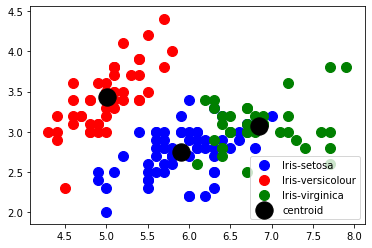

In [12]:

#vissiualizing the clusters 
plt.scatter(X[y_kmeans == 0 , 0] ,X[y_kmeans == 0 , 1] , s =100 , c='blue' , label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1 , 0] ,X[y_kmeans == 1 , 1] , s =100 , c='red' , label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2 , 0] ,X[y_kmeans == 2 , 1] , s =100 , c='green' , label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[ : ,0] ,kmeans.cluster_centers_[ : ,1] ,s=300 , c= 'black' , label='centroid')

plt.legend()